## Pre Work
### Imports, set sns style etc

In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
#sns.set_theme()
from pprint import pprint

from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

from sklearn.decomposition import PCA

from sklearn import datasets

#Setting styles for sns
sns.set_theme(context="notebook", style="darkgrid",font_scale=1.2, rc={"lines.linewidth": 2.5})
#sns.set_style('darkgrid')

### Function and Class Declarations

In [61]:

#Modelling clusters in 2d space
def showClustersIn2D(model, df, title='Cluster Plot', ax=None, centroid_size=40, point_size=15):
    '''Takes in a clustering model, a dataframe and plots the points in 2d using PCA to project the 
    n dimensional dataset onto 2D. Can also optionally pass axes if using subplots, custom title and 
    sizes for points and centroids
    model: clustering model which must have fit_predict and cluster_centers_
    '''
    model.fit_predict(df)
    x = model.cluster_centers_
    pca2 = PCA(n_components=2)
    z=np.append(np.asarray(df),x,axis=0)
    z2 = pca2.fit_transform(z)
    zdf = pd.DataFrame(z2, columns = ['x','y'])
    labels = np.append(model.labels_,['Centroids']*x.shape[0])
    #labels
    sizes={'Centroids':centroid_size}
    for a in model.labels_:
        sizes[str(a)]=point_size
    #print(sizes)


    zdf['clusters'] = labels
    plt.suptitle(title)
    if ax==None:
        kmeansclusterplot = sns.scatterplot(data = zdf, x=zdf.x, y = zdf.y, hue=zdf.clusters, \
                                            size=zdf.clusters, sizes=sizes)
    else:
        kmeansclusterplot = sns.scatterplot(data = zdf, x=zdf.x, y = zdf.y, hue=zdf.clusters, ax=ax, \
                                            size=zdf.clusters, sizes=sizes)


#Defining a child class to AgglomerativeClustering which has a predict method (needed by yellowbrick visualiser)
class AgglomerativeClusteringWithPredict(AgglomerativeClustering):
    def __init__(self, fname, lname):
        super().__init__(fname, lname) 

    def __init__(self, n_clusters, affinity, linkage):
        super().__init__(n_clusters, affinity=affinity, linkage=linkage)

    def predict(self, data):
        self.labels_ = super().fit_predict(data)
    
    def makeClusterCenterList(self):
        temp=[]
        #print(self.df.columns)
        for a in set(self.labels_):
            #print(a)
            x = self.df[self.df['AgglomerativeClusteringWithPredictLabels']==a].mean(axis=0)
            #print(x[:-1])
            temp.append(list(x[:-1]))
        del(self.df)
        self.cluster_centers_ = np.array(temp)

    def fit_predict(self, df):
        self.labels_ = super().fit_predict(df)
        self.df = df.copy()
        self.df['AgglomerativeClusteringWithPredictLabels'] = self.labels_
        self.makeClusterCenterList()
        return self.labels_

    df = pd.DataFrame()
    cluster_centers_ = []
    labels_ = []

In [72]:
iris = datasets.load_iris()
X=iris.data
y=iris.target
X.shape

(150, 4)

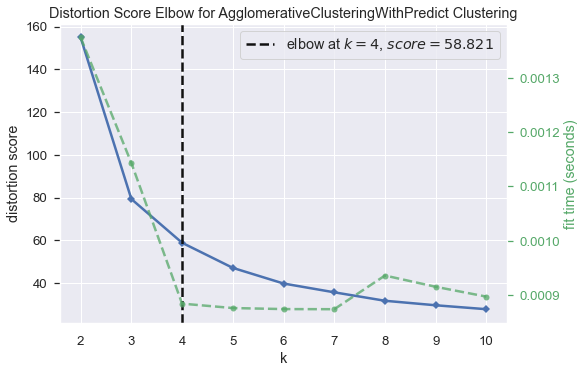

In [63]:
visualizer = KElbowVisualizer(AgglomerativeClusteringWithPredict(n_clusters=None,affinity='euclidean', \
                                                                 linkage='ward'))
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

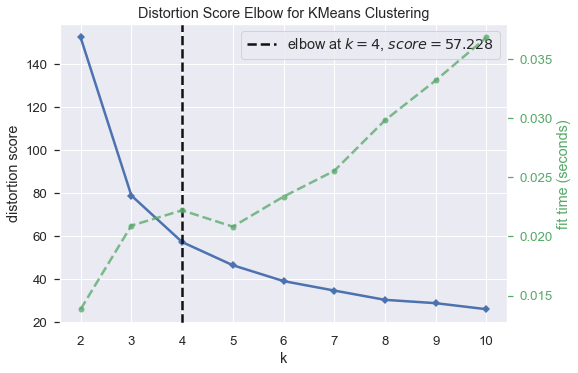

In [64]:
visualizer2=KElbowVisualizer(KMeans())
visualizer2.fit(X)        # Fit the data to the visualizer
visualizer2.show();

In [65]:
#converting X to a dataframe for ease of use in plotting function as below
df = pd.DataFrame(X)


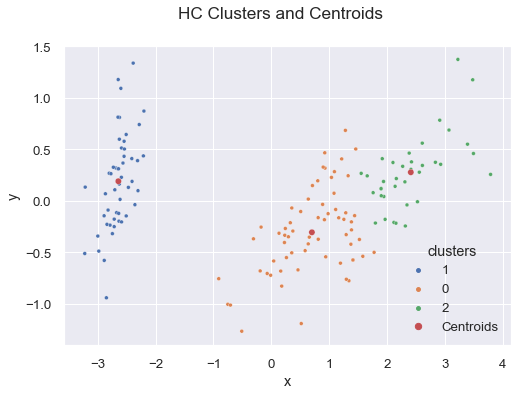

In [70]:
HCmodel = AgglomerativeClusteringWithPredict(n_clusters=3, affinity='euclidean', linkage='ward')
HCmodel.fit_predict(df)
showClustersIn2D(HCmodel, df, title='HC Clusters and Centroids')

In [68]:
#Centroids found with my custom class
HCmodel.cluster_centers_

array([[6.86944444, 3.08611111, 5.76944444, 2.10555556],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.21052632, 2.84473684, 4.74210526, 1.58421053],
       [5.49615385, 2.61538462, 3.95      , 1.21538462]])

In [69]:
#Centroids found by KMeans
kmodel = KMeans(n_clusters=3)
kmodel.fit(X)
kmodel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])